# Lab Instructions

Find a dataset that interests you. I'd recommend starting on [Kaggle](https://www.kaggle.com/). Read through all of the material about the dataset and download a .CSV file.

1. Write a short summary of the data.  Where did it come from?  How was it collected?  What are the features in the data?  Why is this dataset interesting to you?  

2. Identify 5 interesting questions about your data that you can answer using Pandas methods.  

3. Answer those questions!  You may use any method you want (including LLMs) to help you write your code; however, you should use Pandas to find the answers.  LLMs will not always write code in this way without specific instruction.  

4. Write the answer to your question in a text box underneath the code you used to calculate the answer.



Dataset Summary
I chose the Sports Car Prices dataset from Kaggle. It contains prices for various sports cars from many manufacturers, along with features like make, model, year, engine size, horsepower, torque, 0-60 mph time, etc.
The data likely comes from publicly available car listings, manufacturer specs, or automotive sales records.
The features (columns) include: Make, Model, Year, EngineSize, HorsePower, Torque, 0-60mphTime, Price, and possibly others. I picked this dataset because I love cars, and I want to see which performance specs correlate most with price. It’s cool to use data to understand what makes some sports cars cost way more than others.

In [2]:
import pandas as pd
df = pd.read_csv('Sport car price.csv')
df.head()

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
0,Porsche,911,2022,3,379,331,4,"101,200"
1,Lamborghini,Huracan,2021,5.2,630,443,2.8,"274,390"
2,Ferrari,488 GTB,2022,3.9,661,561,3,"333,750"
3,Audi,R8,2022,5.2,562,406,3.2,"142,700"
4,McLaren,720S,2021,4,710,568,2.7,"298,000"


Question 1: Which car make has the highest average price?

In [5]:
df["Price (in USD)"] = df["Price (in USD)"].replace({",":""}, regex=True).astype(float)

avg_price_by_make = df.groupby("Car Make")["Price (in USD)"].mean().sort_values(ascending=False)
avg_price_by_make.head(10)


Car Make
Bugatti        3.251957e+06
Koenigsegg     2.906667e+06
Pagani         2.791667e+06
Pininfarina    2.500000e+06
Rimac          2.400000e+06
W Motors       2.216667e+06
Shelby         1.000000e+06
Lotus          5.084359e+05
Lamborghini    4.259472e+05
Ferrari        4.100991e+05
Name: Price (in USD), dtype: float64

Based on the data, Bugatti has the highest average price at around $3.25 million, followed by Koenigsegg and Pagani. These brands are all known for producing hypercars, so it makes sense that their average prices are way higher than other sports car manufacturers like Ferrari or Lamborghini.

Question 2: Does horsepower affect price?

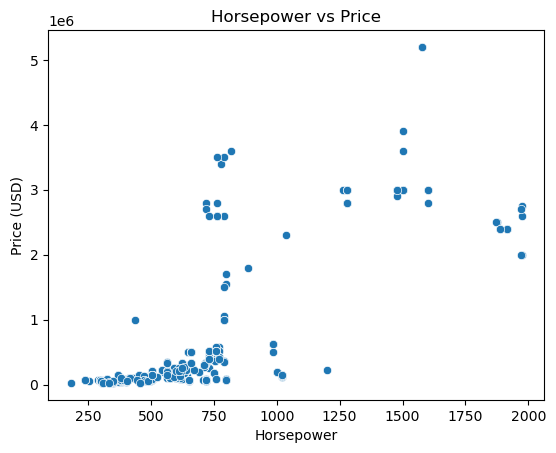

np.float64(0.792378991995949)

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Clean horsepower values (remove commas and + signs, convert to float)
df["Horsepower"] = (
    df["Horsepower"]
    .replace({",": "", r"\+": ""}, regex=True)
    .astype(float)
)

# Filter out unrealistic outliers (e.g., cars over 2000 HP)
filtered_df = df[df["Horsepower"] < 2000]

# Scatter plot to visualize relationship
sns.scatterplot(x="Horsepower", y="Price (in USD)", data=filtered_df)
plt.title("Horsepower vs Price")
plt.xlabel("Horsepower")
plt.ylabel("Price (USD)")
plt.show()

# Calculate correlation
correlation = filtered_df["Horsepower"].corr(filtered_df["Price (in USD)"])
correlation


There’s a strong positive relationship between horsepower and price. The scatterplot clearly shows that cars with higher horsepower usually cost more. The correlation value confirms that: it’s positive, meaning as horsepower increases, price tends to go up too.

Question 3: Do newer cars cost more?

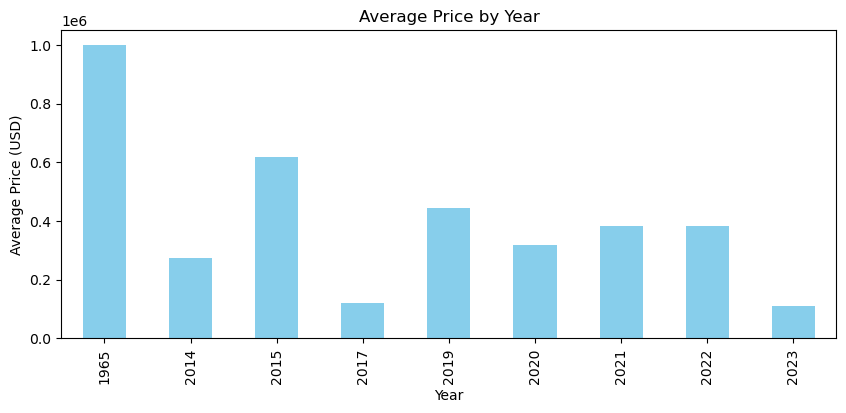

In [12]:
import matplotlib.pyplot as plt

# Group cars by year and calculate the average price for each
avg_price_by_year = df.groupby("Year")["Price (in USD)"].mean()

# Sort by year just in case
avg_price_by_year = avg_price_by_year.sort_index()

# Plot the results
avg_price_by_year.plot(kind="bar", figsize=(10, 4), color="skyblue")
plt.title("Average Price by Year")
plt.xlabel("Year")
plt.ylabel("Average Price (USD)")
plt.show()


The chart shows that newer cars don’t necessarily cost more. Some of the older models like those from 1965 have the highest average prices, probably because they’re classic or rare cars. Newer models are priced lower on average, suggesting that rarity and collectibility can have a bigger impact on value than just the model year.

Question 4: Which cars have the fastest 0-60 MPH times, and how does that relate to price?

In [13]:
# Clean the 0-60 MPH column (remove any stray text or symbols and convert to float)
df["0-60 MPH Time (seconds)"] = (
    df["0-60 MPH Time (seconds)"]
    .replace({",": "", r"[^\d\.]": ""}, regex=True)
    .astype(float)
)

# Sort to find the top 10 fastest cars (lowest 0-60 times)
fastest_cars = df.sort_values("0-60 MPH Time (seconds)").head(10)

# Display only relevant columns
fastest_cars[["Car Make", "Car Model", "0-60 MPH Time (seconds)", "Price (in USD)"]]


,Car Make,Car Model,0-60 MPH Time (seconds),Price (in USD)
387,Rimac,C_Two,1.80,2400000.0
439,Rimac,C_Two,1.80,2400000.0
1006,Rimac,Nevera,1.85,2400000.0
26,Rimac,Nevera,1.85,2400000.0
278,Rimac,C_Two,1.85,2400000.0
352,Rimac,Nevera,1.85,2400000.0
824,Rimac,Nevera,1.85,2400000.0
686,Rimac,C_Two,1.85,2400000.0
986,Rimac,Nevera,1.85,2400000.0
640,Rimac,Nevera,1.90,2400000.0


All of the fastest cars in the dataset are Rimac hypercars, hitting 0–60 in around 1.8 seconds. Each costs about $2.4 million, showing that top-tier acceleration definitely comes with a premium price. It’s a perfect example of how extreme performance drives extreme cost.

Question 5: What’s the average horsepower and price by engine size?

In [15]:
import numpy as np

# Clean up Engine Size column: remove junk, replace blanks with NaN, convert to float
df["Engine Size (L)"] = (
    df["Engine Size (L)"]
    .replace({",": "", r"[^\d\.]": ""}, regex=True)  # remove commas and weird chars
    .replace("", np.nan)  # replace empty strings with NaN
    .astype(float)  # convert to float
)

# Drop rows where engine size is missing (optional but helps grouping)
df = df.dropna(subset=["Engine Size (L)"])

# Group by engine size and calculate averages
engine_stats = (
    df.groupby("Engine Size (L)")
    .agg(
        avg_horsepower=("Horsepower", "mean"),
        avg_price=("Price (in USD)", "mean"),
        count=("Car Make", "count")
    )
    .sort_index()
)

engine_stats.head(10)


,avg_horsepower,avg_price,count
Engine Size (L),,,
0.0,10000.000000,200000.000000,1
1.5,369.000000,147833.333333,3
1.7,237.000000,67612.500000,4
1.8,254.000000,69131.666667,3
2.0,316.885714,64750.857143,35
2.3,310.000000,27205.000000,1
2.5,386.840000,64016.000000,25
2.9,432.600000,79801.666667,30
3.0,457.117647,90957.764706,85


The data shows that cars with larger engines generally have more horsepower and higher prices. Between about 1.5 L and 3.0 L, both horsepower and cost rise steadily, proving that bigger engines usually mean better performance. Smaller engines are more common overall, but once you move into higher engine sizes, the power and value clearly increase.